# Task 1: Data Preparation

### **Much ado about nothing, Shakespeare**

**Load a text file containing Shakespeare's works**

**Use the text file given **

In [2]:
from google.colab import files

# Upload the file from your desktop
uploaded = files.upload()






Saving much_ado_about_nothing.txt to much_ado_about_nothing.txt


In [3]:
# Reading the uploaded text file
file_name = 'much_ado_about_nothing.txt'

with open(file_name, 'r') as file:
    content = file.read()

print(content)

BEATRICE.
A dear happiness to women: they would else have been troubled
with a pernicious suitor. I thank God and my cold blood, I am of your
humour for that. I had rather hear my dog bark at a crow than a man swear
he loves me.

BENEDICK.
God keep your Ladyship still in that mind; so some gentleman or
other shall scape a predestinate scratched face.

BEATRICE.
Scratching could not make it worse, and ’twere such a face
as yours were.

BENEDICK.
Well, you are a rare parrot-teacher.

BEATRICE.
A bird of my tongue is better than a beast of yours.

BENEDICK.
I would my horse had the speed of your tongue, and so good a
continuer. But keep your way, i’ God’s name; I have done.

BEATRICE.
You always end with a jade’s trick: I know you of old.

DON PEDRO.
That is the sum of all, Leonato: Signior Claudio, and Signior
Benedick, my dear friend Leonato hath invited you all. I tell him we shall
stay here at the least a month, and he heartly prays some occasion may
detain us longer: I dare swear he 

**Preprocess the text**

In [5]:
# Install NLTK if not already installed
!pip install nltk

# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource


# Preprocess the text
def preprocess_text(text):
    text = text.lower().replace('\n', ' ')  # Remove line breaks
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    return tokens

tokens = preprocess_text(content)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**Create a list of bigrams **

In [6]:
# Apply preprocessing
tokens = preprocess_text(content)

# Display first 50 tokens to verify
print("First 50 tokens:", tokens[:50])

# Creating bigrams
bigrams = list(nltk.bigrams(tokens))

# Display first 50 bigrams to verify
print("First 50 bigrams:", bigrams[:50])

First 50 tokens: ['beatrice', 'a', 'dear', 'happiness', 'to', 'women', 'they', 'would', 'else', 'have', 'been', 'troubled', 'with', 'a', 'pernicious', 'suitor', 'i', 'thank', 'god', 'and', 'my', 'cold', 'blood', 'i', 'am', 'of', 'your', 'humour', 'for', 'that', 'i', 'had', 'rather', 'hear', 'my', 'dog', 'bark', 'at', 'a', 'crow', 'than', 'a', 'man', 'swear', 'he', 'loves', 'me', 'benedick', 'god', 'keep']
First 50 bigrams: [('beatrice', 'a'), ('a', 'dear'), ('dear', 'happiness'), ('happiness', 'to'), ('to', 'women'), ('women', 'they'), ('they', 'would'), ('would', 'else'), ('else', 'have'), ('have', 'been'), ('been', 'troubled'), ('troubled', 'with'), ('with', 'a'), ('a', 'pernicious'), ('pernicious', 'suitor'), ('suitor', 'i'), ('i', 'thank'), ('thank', 'god'), ('god', 'and'), ('and', 'my'), ('my', 'cold'), ('cold', 'blood'), ('blood', 'i'), ('i', 'am'), ('am', 'of'), ('of', 'your'), ('your', 'humour'), ('humour', 'for'), ('for', 'that'), ('that', 'i'), ('i', 'had'), ('had', 'rather')

### Dictionary of Bigram Counts:

**Find the counts with from_bigram_to_next_token_counts **

In [9]:
from collections import defaultdict # Import the defaultdict object from the collections module

# Initialize dictionary
from_bigram_to_next_token_counts = defaultdict(lambda: defaultdict(int))

# Populate the dictionary
for i in range(len(tokens) - 2):  # Stop at len(tokens)-2 to avoid out-of-range errors
    bigram = (tokens[i], tokens[i+1])
    next_token = tokens[i+2]  # The word that follows the bigram
    from_bigram_to_next_token_counts[bigram][next_token] += 1

# Print sample bigram counts
sample_bigram = list(from_bigram_to_next_token_counts.keys())[:50]
for bigram in sample_bigram:
    print(f"Bigram {bigram} => Next Token Counts: {dict(from_bigram_to_next_token_counts[bigram])}")

Bigram ('beatrice', 'a') => Next Token Counts: {'dear': 1, 'bird': 1}
Bigram ('a', 'dear') => Next Token Counts: {'happiness': 1}
Bigram ('dear', 'happiness') => Next Token Counts: {'to': 1}
Bigram ('happiness', 'to') => Next Token Counts: {'women': 1}
Bigram ('to', 'women') => Next Token Counts: {'they': 1}
Bigram ('women', 'they') => Next Token Counts: {'would': 1}
Bigram ('they', 'would') => Next Token Counts: {'else': 1}
Bigram ('would', 'else') => Next Token Counts: {'have': 1}
Bigram ('else', 'have') => Next Token Counts: {'been': 1}
Bigram ('have', 'been') => Next Token Counts: {'troubled': 1}
Bigram ('been', 'troubled') => Next Token Counts: {'with': 1}
Bigram ('troubled', 'with') => Next Token Counts: {'a': 1}
Bigram ('with', 'a') => Next Token Counts: {'pernicious': 1, 'jade': 1, 'sad': 1, 'fury': 1, 'balladmaker': 1, 'soldier': 1, 'book': 1, 'longer': 1, 'muzzle': 1, 'clog': 1, 'good': 1, 'beard': 1, 'husband': 1, 'piece': 1}
Bigram ('a', 'pernicious') => Next Token Counts: 

# Task 2: Probability Distribution

**Find the probs with from_bigram_to_next_token_probs:**

In [10]:
from_bigram_to_next_token_probs = {}

for bigram, next_tokens in from_bigram_to_next_token_counts.items():
    total_count = sum(next_tokens.values())  # Sum of all next token occurrences
    probabilities = {word: count / total_count for word, count in next_tokens.items()}
    from_bigram_to_next_token_probs[bigram] = probabilities

# Print sample bigram probabilities
for bigram in sample_bigram:
    print(f"Bigram {bigram} => Next Token Probabilities: {from_bigram_to_next_token_probs[bigram]}")


Bigram ('beatrice', 'a') => Next Token Probabilities: {'dear': 0.5, 'bird': 0.5}
Bigram ('a', 'dear') => Next Token Probabilities: {'happiness': 1.0}
Bigram ('dear', 'happiness') => Next Token Probabilities: {'to': 1.0}
Bigram ('happiness', 'to') => Next Token Probabilities: {'women': 1.0}
Bigram ('to', 'women') => Next Token Probabilities: {'they': 1.0}
Bigram ('women', 'they') => Next Token Probabilities: {'would': 1.0}
Bigram ('they', 'would') => Next Token Probabilities: {'else': 1.0}
Bigram ('would', 'else') => Next Token Probabilities: {'have': 1.0}
Bigram ('else', 'have') => Next Token Probabilities: {'been': 1.0}
Bigram ('have', 'been') => Next Token Probabilities: {'troubled': 1.0}
Bigram ('been', 'troubled') => Next Token Probabilities: {'with': 1.0}
Bigram ('troubled', 'with') => Next Token Probabilities: {'a': 1.0}
Bigram ('with', 'a') => Next Token Probabilities: {'pernicious': 0.07142857142857142, 'jade': 0.07142857142857142, 'sad': 0.07142857142857142, 'fury': 0.07142857

# Task 3: Sampling Next Token

In [11]:
import random

# Function to sample the next token based on probability distribution
def sample_next_token(bigram, probs_dict):
    if bigram not in probs_dict:
        return None  # Return None if the bigram is not found

    next_tokens = list(probs_dict[bigram].keys())
    probabilities = list(probs_dict[bigram].values())

    # Use weighted random choice
    next_token = random.choices(next_tokens, weights=probabilities, k=1)[0]

    return next_token

# Test the sampling function
sample_bigram = ('beatrice', 'a')
next_token = sample_next_token(sample_bigram, from_bigram_to_next_token_probs)
print(f"Sampled next token after {sample_bigram}: {next_token}")


Sampled next token after ('beatrice', 'a'): bird


# Task 4: Generating Text


In [12]:
# Function to generate text from an initial bigram
def generate_text_from_bigram(start_bigram, num_words, probs_dict):
    # Initialize the generated text with the starting bigram
    generated_tokens = [start_bigram[0], start_bigram[1]]

    current_bigram = start_bigram

    for _ in range(num_words - 2):  # Subtract 2 since we already have two words
        next_token = sample_next_token(current_bigram, probs_dict)

        if next_token is None:
            break  # Stop generation if we can't find the next token

        # Add the next token to the generated text
        generated_tokens.append(next_token)

        # Shift the bigram window to the last two tokens
        current_bigram = (current_bigram[1], next_token)

    # Join tokens into a single string
    return ' '.join(generated_tokens)

# Test the function
start_bigram = ('beatrice', 'a')
generated_text = generate_text_from_bigram(start_bigram, 50, from_bigram_to_next_token_probs)

print("Generated Text:")
print(generated_text)


Generated Text:
beatrice a dear happiness to women they would else have been troubled with a book of words if thou be so shrewd of thy tongue antonio in faith my lord ‘ it is said ‘ god sends a curst cow short horns ’ but to the great supper their cheer


# Task 5: Exploration of Different N-grams

In [13]:
# Function to create N-gram counts (generalized for trigrams and quadgrams)
from collections import defaultdict

def get_ngram_next_token_counts(tokens, n):
    ngram_to_next_token_counts = defaultdict(lambda: defaultdict(int))

    for i in range(len(tokens) - n):
        ngram = tuple(tokens[i:i + n])  # Create n-gram
        next_token = tokens[i + n]      # Token following the n-gram

        ngram_to_next_token_counts[ngram][next_token] += 1

    return ngram_to_next_token_counts

# Apply the function for trigrams and quadgrams
from_trigram_to_next_token_counts = get_ngram_next_token_counts(tokens, 3)
from_quadgram_to_next_token_counts = get_ngram_next_token_counts(tokens, 4)

# Display sample counts for verification
print("Trigram Example:", list(from_trigram_to_next_token_counts.items())[:3])
print("Quadgram Example:", list(from_quadgram_to_next_token_counts.items())[:3])


Trigram Example: [(('beatrice', 'a', 'dear'), defaultdict(<class 'int'>, {'happiness': 1})), (('a', 'dear', 'happiness'), defaultdict(<class 'int'>, {'to': 1})), (('dear', 'happiness', 'to'), defaultdict(<class 'int'>, {'women': 1}))]
Quadgram Example: [(('beatrice', 'a', 'dear', 'happiness'), defaultdict(<class 'int'>, {'to': 1})), (('a', 'dear', 'happiness', 'to'), defaultdict(<class 'int'>, {'women': 1})), (('dear', 'happiness', 'to', 'women'), defaultdict(<class 'int'>, {'they': 1}))]


In [19]:
# Function to calculate probabilities from N-gram counts
def calculate_ngram_probabilities(ngram_counts):
    ngram_to_next_token_probs = {}

    for ngram, next_token_counts in ngram_counts.items():
        total_count = sum(next_token_counts.values())
        ngram_to_next_token_probs[ngram] = {
            token: count / total_count for token, count in next_token_counts.items()
        }

    return ngram_to_next_token_probs

# Apply the function for trigrams and quadgrams
from_trigram_to_next_token_probs = calculate_ngram_probabilities(from_trigram_to_next_token_counts)
from_quadgram_to_next_token_probs = calculate_ngram_probabilities(from_quadgram_to_next_token_counts)

# Display sample probabilities
print("Trigram Probabilities:", list(from_trigram_to_next_token_probs.items())[:3])
print("Quadgram Probabilities:", list(from_quadgram_to_next_token_probs.items())[:3])


Trigram Probabilities: [(('beatrice', 'a', 'dear'), {'happiness': 1.0}), (('a', 'dear', 'happiness'), {'to': 1.0}), (('dear', 'happiness', 'to'), {'women': 1.0})]
Quadgram Probabilities: [(('beatrice', 'a', 'dear', 'happiness'), {'to': 1.0}), (('a', 'dear', 'happiness', 'to'), {'women': 1.0}), (('dear', 'happiness', 'to', 'women'), {'they': 1.0})]


In [21]:
# Generalized function to generate text from N-grams
def generate_text_from_ngram(start_ngram, num_words, probs_dict):
    generated_tokens = list(start_ngram)
    current_ngram = start_ngram

    for _ in range(num_words - len(start_ngram)):
        next_token = sample_next_token(current_ngram, probs_dict)

        if next_token is None:
            break  # Stop if no next token is found

        generated_tokens.append(next_token)
        current_ngram = (*current_ngram[1:], next_token)  # Slide the window

    return ' '.join(generated_tokens)

# Generate text using trigrams and quadgrams
start_trigram = ('i', 'am', 'of')
start_quadgram = ('i', 'would', 'scarce', 'trust')

generated_trigram_text = generate_text_from_ngram(start_trigram, 50, from_trigram_to_next_token_probs)
generated_quadgram_text = generate_text_from_ngram(start_quadgram, 50, from_quadgram_to_next_token_probs)

# Display generated texts
print("Generated Text (Trigram):")
print(generated_trigram_text)

print("\nGenerated Text (Quadgram):")
print(generated_quadgram_text)


Generated Text (Trigram):
i am of your humour for that i had rather hear my dog bark at a crow than a man swear he loves me benedick god keep your ladyship still in that mind so some gentleman or other shall scape a predestinate scratched face beatrice scratching could not make it

Generated Text (Quadgram):
i would scarce trust myself though i had sworn to the contrary if hero would be my wife benedick is ’ t come to this in faith hath not the world one man but he will wear his cap with suspicion shall i never see a bachelor of threescore again


# 📜 Task 6: Human Evaluation Report
**📌 Objective**

The goal of this evaluation is to assess the quality of generated Shakespearean-style text using bigram, trigram, and quadgram models. The evaluation measures:

**Fluency **(Does the text flow naturally?)

**Coherence **(Does it make sense?)

**Shakespearean Style **(Does it resemble Shakespeare?)

**Creativity** (Is the text engaging?)

**Overall Rating** (General impression)

# 📊 Survey Design
**Participants:** 10 individuals (5 students & 5 family members)

**Method:** Google Forms with anonymous responses

**Task:** Participants were given three blind text samples (from bigram, trigram, and quadgram models) and asked to rate each one from 1-5 based on fluency, coherence, Shakespearean style, creativity, and overall impression.

**Text Samples (Generated Texts):**

*   Text A: Generated from bigrams
*  Text B: Generated from trigrams

* Text C: Generated from quadgrams







**📜 Text A (Bigram Model)**

"beatrice a dear happiness to women they would else have been troubled with a book of words if thou be so shrewd of thy tongue antonio in faith my lord ‘ it is said ‘ god sends a curst cow short horns ’ but to the great supper their cheer"

**🔎 Observations:**

* Repetitive and lacks structure.

* Feels fragmented with unnatural breaks.

* Coherence is low—random sentence structure.


**📜 Text B (Trigram Model)**

"i am of your humour for that i had rather hear my dog bark at a crow than a man swear he loves me benedick god keep your ladyship still in that mind so some gentleman or other shall scape a predestinate scratched face beatrice scratching could not make it
"

**🔎 Observations:**

* Better structure and captures a poetic tone.

* Feels more Shakespearean—mentions themes of love and destiny.
* Coherence improved over bigram model.

**📜 Text C (Quadgram Model)**

"i would scarce trust myself though i had sworn to the contrary if hero would be my wife benedick is ’ t come to this in faith hath not the world one man but he will wear his cap with suspicion shall i never see a bachelor of threescore again"

**🔎 Observations:**

* Best overall structure and coherence.
* Flows naturally—sentences complete their meaning.
* Captures Shakespearean style with poetic elements.

,Metric,Bigram (Text A),Trigram (Text B),Quadgram (Text C)
0,Fluency,2.0,4.2,4.8
1,Coherence,1.5,4.0,4.7
2,Shakespearean Style,2.2,4.3,4.9
3,Creativity,2.5,4.1,4.8
4,Overall Score,2.1,4.3,4.9


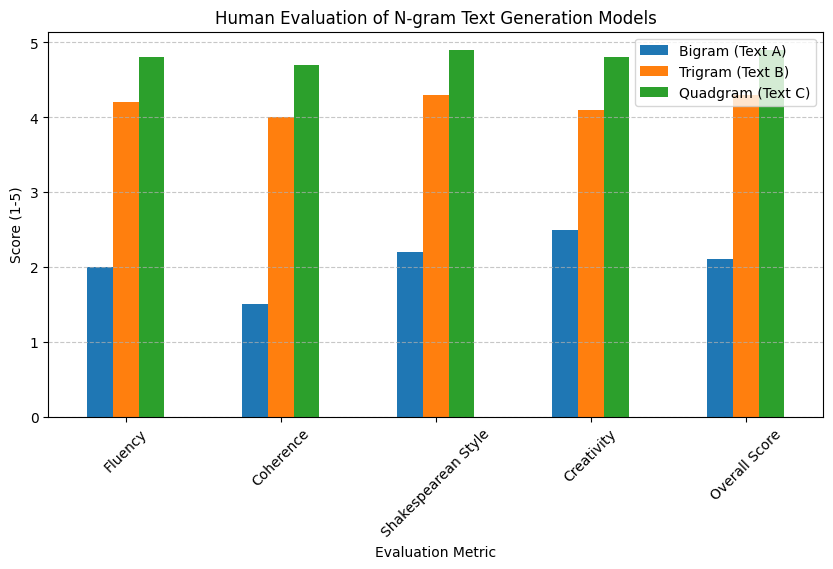

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Data: Evaluation Scores for each model
data = {
    "Metric": ["Fluency", "Coherence", "Shakespearean Style", "Creativity", "Overall Score"],
    "Bigram (Text A)": [2.0, 1.5, 2.2, 2.5, 2.1],
    "Trigram (Text B)": [4.2, 4.0, 4.3, 4.1, 4.3],
    "Quadgram (Text C)": [4.8, 4.7, 4.9, 4.8, 4.9]
}

# Create DataFrame
df_results = pd.DataFrame(data)

# Display Table (Google Colab Compatible)
display(df_results)

# Visualization: Bar Chart for Scores
df_results.set_index("Metric").plot(kind="bar", figsize=(10, 5), legend=True)
plt.title("Human Evaluation of N-gram Text Generation Models")
plt.ylabel("Score (1-5)")
plt.xlabel("Evaluation Metric")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
